# INSTALLATION GUIDE:


## Basemap Installation:
1. Open Anaconda Prompt
2. Type 'conda config --add channels conda-forge', this will install the forge channel which is necessary for basemap
3. Once '' that's ''' installed, type 'conda install basemap'
4. Once that's installed, you should be ready to go
5. Test it out by copying & pasting the code in cell 1
6. If you get a Mercator Projection, then the code was installed just fine
7. If you get an error message: "Key Error PROJ_LIB"
8. Go to 'https://github.com/matplotlib/basemap/blob/master/lib/mpl_toolkits/basemap/data/epsg'
9. Download the file 'epsg'
10. Move file to C:/Users/[USERNAME]/Anaconda3/Lib/site-packages/mpl_toolkits/basemap
11. Restart Kernel and attempt to run it again
12. If the problem is resolved, SUCCESS.
13. If not, then use google for more troubleshooting

BASEMAP INSTALLATION LINKS:
https://github.com/conda-forge/basemap-feedstock
https://github.com/matplotlib/basemap/blob/master/lib/mpl_toolkits/basemap/data/epsg
https://matplotlib.org/basemap/

Geocoder Installation:
1. Open Anaconda Prompt
2. Type 'pip install geocoder'
3. Let install

GEOCODER INSTALLATION LINKS:
https://geocoder.readthedocs.io/api.html#installation

------------------------------------------------------------------------------------------------------------------------

HOW TO USE:

1. Ensure csv file is ordered by City -> State -> Temperature
2. Move .csv file to the same folder as this notebook
3. Change open("[CSV NAME]", 'r') to exact csv name
4. Run code.
5. Read comments to understand customizable options
6. Use last cell as a reference for more map options

-------------------------------------------------------------------------------------------------------------------------

USEFUL BASEMAP DOCUMENTATION:
https://matplotlib.org/basemap/api/basemap_api.html COMPLETE DOCUMENTATION
https://matplotlib.org/basemap/users/mapsetup.html
https://readthedocs.org/projects/basemaptutorial/downloads/pdf/latest/

USEFUL MATPLOTLIB DOCUMENTATION:
https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.annotate.html COMPLETE DOCUMENTATION

USEFUL PYTHON DOCUMENTATION
https://www.protechtraining.com/blog/post/python-for-beginners-reading-manipulating-csv-files-737
https://basemaptutorial.readthedocs.io/en/latest/plotting_data.html
https://basemaptutorial.readthedocs.io/en/latest/index.html



In [8]:
# imports necessary libraries
import os
import geocoder
import csv
os.environ['PROJ_LIB'] = 'C:/Users/Vishesh/Anaconda3/Lib/site-packages/mpl_toolkits/basemap'
from mpl_toolkits.basemap import Basemap
#import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Opens csv and creates a variable for it: city_temperatures
city_temperatures = open("city_temperatures.csv", "r")

# Reads csv to variable, so it can be used for analysis
citytemps = csv.reader(city_temperatures, delimiter = ",")

next(citytemps) # Skips the header

# initializes empty lists so that values can be added
city = []
state = []
temperatures = []
g = []
latitude = []
longitude = []
coordinates = []
temps = []
t = 0

for row in citytemps:
    city.append(row[0]) # creates a list of the cities
    state.append(row[1]) # creates a list of the states
    temperatures.append(float(row[2])) # creates a list of the temperatures as floating values
    temps.append(row[2]) # creates the list of the temperatures as strings, for naming purposes
    g = geocoder.location(city[t]) # creates a list of coordinates associated with each city
    latitude.append(g.latitude)  # extracts the latitudes of these coordinates and adds them to a list
    longitude.append(g.longitude) # extracts the longitudes of these coordinates and adds them to a list
    coordinates.append(g.latlng) # extracts both the latitudes and longitudes, and adds them to a list together
    t = t + 1 # go to the next city


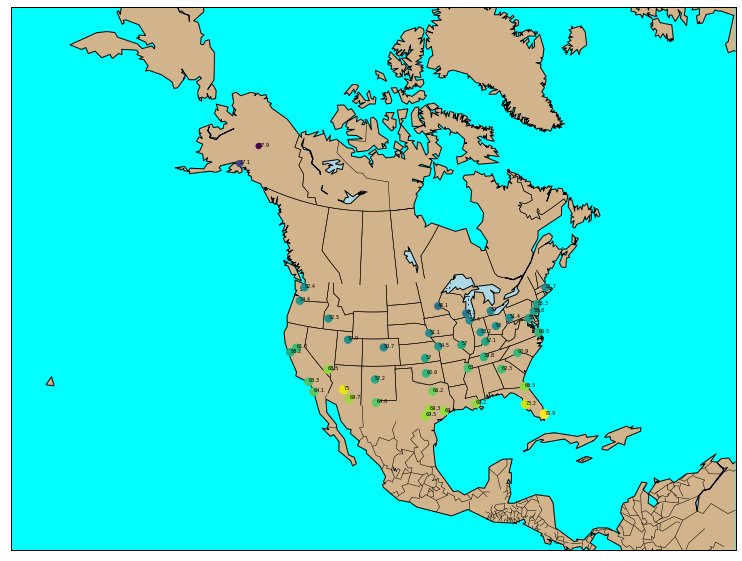

In [12]:
# Controls size of overall plt figure
plt.figure(figsize=(20,10))

# setup Lambert Conformal basemap
# Oriented at North America
map = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)

# controls the color of the continents(landmasses)
map.fillcontinents(color='tan',lake_color='lightblue', zorder = 1)

# creates the coastline borders
map.drawcoastlines()

#creates outlines for each of the states
map.drawstates()

# creates the ocean colors
map.drawmapboundary(fill_color='aqua')

# Sets x and y equal to the mapping of our list of longitudes and latitudes
x, y = map(longitude, latitude)

# use matploblib to plot the (x, y) points, the sizes and colors are based on our list of temperatures
# zorder ensures the plot points are on the highest level
plt.scatter(x, y, s = temperatures, c = temperatures, zorder = 2)

# for each index in the list of temperatures
# we annotate each point with the average temperature associated with that (x, y)
# fontsize is small, and the annotations are set to be at the same exact point as the coordinates
for i in range(len(temps)):
    plt.annotate(temps[i], xy = (x[i], y[i]), fontsize = 5, xytext = (x[i], y[i]))

# generates plot
plt.show()

In [ ]:
#Testing

#print(len(latitude))
#print(len(longitude))
#print(type(float(temperatures[1])))
for i in range(len(temps)):
    print(longitude[i])
    print(latitude[i])
    print(temps[i])

In [ ]:
# Useful map creation functions

fig = plt.figure(num=None, figsize=(12, 8) ) 
map = Basemap(width=6000000,height=4500000,resolution='c',projection='aea',lat_1=35.,lat_2=45,lon_0=-100,lat_0=40)
map.drawcoastlines(linewidth=0.5)
map.fillcontinents(color='tan',lake_color='lightblue')
# draw parallels and meridians.
map.drawparallels(np.arange(-90.,91.,15.),labels=[True,True,False,False],dashes=[2,2])
map.drawmeridians(np.arange(-180.,181.,15.),labels=[False,False,False,True],dashes=[2,2])
map.drawmapboundary(fill_color='lightblue')
map.drawcountries(linewidth=2, linestyle='solid', color='k' ) 
map.drawstates(linewidth=0.5, linestyle='solid', color='k')
map.drawrivers(linewidth=0.5, linestyle='solid', color='blue')


